In [1]:
# cargar tweets  del cvs 
import pandas as pd
data = pd.read_csv("francia.csv", header = None, encoding='utf-8', names = ['Time', 'Tweets'])
data

,Time,Tweets
0,2022-02-22 22:32:53+00:00,@ColDesde @FranciaMarquezM @wilsonariasc @Nico...
1,2022-02-22 22:31:26+00:00,"RT @nnguerrero: “Este no es el país de papá, m..."
2,2022-02-22 22:31:04+00:00,RT @FranciaMarquezM: Es hipócrita que un perso...
3,2022-02-22 22:31:01+00:00,RT @RoyBarreras: “Nuestro compromiso es con la...
4,2022-02-22 22:30:31+00:00,RT @FranciaMarquezM: ¡Estamos haciendo histori...
...,...,...
17761,2022-02-19 21:50:50+00:00,RT @FranciaMarquezM: Creo que en vez decir que...
17762,2022-02-19 21:50:47+00:00,@FranciaMarquezM Ud ofende al electorado con s...
17763,2022-02-19 21:50:42+00:00,RT @FranciaMarquezM: ¡Le decimos nunca mas al ...
17764,2022-02-19 21:50:41+00:00,@santiuribedel10 @FranciaMarquezM @PactoCol @u...


In [2]:
# Borrando duplicados de los tweets
dfaux= data.drop_duplicates(subset=['Tweets'])

dfaux

,Time,Tweets
0,2022-02-22 22:32:53+00:00,@ColDesde @FranciaMarquezM @wilsonariasc @Nico...
1,2022-02-22 22:31:26+00:00,"RT @nnguerrero: “Este no es el país de papá, m..."
2,2022-02-22 22:31:04+00:00,RT @FranciaMarquezM: Es hipócrita que un perso...
3,2022-02-22 22:31:01+00:00,RT @RoyBarreras: “Nuestro compromiso es con la...
4,2022-02-22 22:30:31+00:00,RT @FranciaMarquezM: ¡Estamos haciendo histori...
...,...,...
17757,2022-02-19 21:51:49+00:00,@petrogustavo y sus nuevos mejores amigos cree...
17759,2022-02-19 21:51:06+00:00,Dios!! Le besé la mano a @FranciaMarquezM 😭❤️😭...
17760,2022-02-19 21:50:57+00:00,RT @DarioR60778542: @milous3646 @camiloparadag...
17762,2022-02-19 21:50:47+00:00,@FranciaMarquezM Ud ofende al electorado con s...


In [3]:
# Limpieza de tweets
from unicodedata import normalize
import re
import string

dfaux["Tweets_limpios"]=data["Tweets"]
# #removing hashtags related to globalwarming
def rem_hashtags(text):
    processed_text = re.sub(r"#@FranciaMarquezM", "", text)
    processed_text = " ".join(processed_text.split())
    return processed_text
dfaux["Tweets_limpios"] = dfaux["Tweets_limpios"].apply(lambda x:rem_hashtags(x))

#removing tagged users from the tweets
def remove_users(text):
    processed_text = re.sub(r'@\w+ ?',"",text)
    processed_text = " ".join(processed_text.split())
    return processed_text
dfaux["Tweets_limpios"] = dfaux["Tweets_limpios"].apply(lambda x:remove_users(x))

#removing hyperlinks mentioned in the tweets
def remove_links(text):
    processed_text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)
    processed_text = " ".join(processed_text.split())
    return processed_text
dfaux["Tweets_limpios"] = dfaux["Tweets_limpios"].apply(lambda x:remove_links(x))

#making all tweets lowercase
def lowercase_word(text):
    text  = "".join([char.lower() for char in text])
    text = re.sub(r"rt", "", text)
    punct = string.punctuation
    text= re.sub(r"%punct","", text)
    
    return text
dfaux["Tweets_limpios"] = dfaux["Tweets_limpios"].apply(lambda x: lowercase_word(x))

def normalizarP(text):
    palabra = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
             normalize("NFD",text), 0, re.I)
    palabra= normalize('NFC',palabra)
    return palabra

dfaux["Tweets_limpios"] = dfaux["Tweets_limpios"].apply(lambda x: normalizarP(x))


dfaux

<ipython-input-3-636d2961c187>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaux["Tweets_limpios"]=data["Tweets"]
<ipython-input-3-636d2961c187>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaux["Tweets_limpios"] = dfaux["Tweets_limpios"].apply(lambda x:rem_hashtags(x))
<ipython-input-3-636d2961c187>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,Time,Tweets,Tweets_limpios
0,2022-02-22 22:32:53+00:00,@ColDesde @FranciaMarquezM @wilsonariasc @Nico...,los acompañamos y les agradecemos.izquierda po...
1,2022-02-22 22:31:26+00:00,"RT @nnguerrero: “Este no es el país de papá, m...",": “este no es el pais de papa, mama, hijos; e..."
2,2022-02-22 22:31:04+00:00,RT @FranciaMarquezM: Es hipócrita que un perso...,: es hipocrita que un personaje como nh maine...
3,2022-02-22 22:31:01+00:00,RT @RoyBarreras: “Nuestro compromiso es con la...,: “nuestro compromiso es con lapaz…” dice . b...
4,2022-02-22 22:30:31+00:00,RT @FranciaMarquezM: ¡Estamos haciendo histori...,: ¡estamos haciendo historia! la despenalizac...
...,...,...,...
17757,2022-02-19 21:51:49+00:00,@petrogustavo y sus nuevos mejores amigos cree...,y sus nuevos mejores amigos creen que alguien ...
17759,2022-02-19 21:51:06+00:00,Dios!! Le besé la mano a @FranciaMarquezM 😭❤️😭...,dios!! le bese la mano a 😭❤️😭❤️ francia presid...
17760,2022-02-19 21:50:57+00:00,RT @DarioR60778542: @milous3646 @camiloparadag...,: pacto histerico
17762,2022-02-19 21:50:47+00:00,@FranciaMarquezM Ud ofende al electorado con s...,ud ofende al electorado con sus arengas le rec...


In [4]:
# Uso de NLTK
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
texto="Esto es un texto de prueba para ver el funcionamiento, de la libreria NLTK ademas de como se tokeniza las palabras "
stop_words =set(stopwords.words('spanish'))

def Tokenizar(texto):
    word_tokens = word_tokenize(texto)
    word_tokens =list(filter(lambda token: token not in string.punctuation ,word_tokens))
    filtro=[ palabra for  palabra in word_tokens if palabra not in stop_words]
    tokens=",".join(filtro)
    return tokens

dfaux["Tokens"]=dfaux["Tweets_limpios"].apply(lambda x: Tokenizar(x))

dfaux

<ipython-input-4-f0b3b63460c8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaux["Tokens"]=dfaux["Tweets_limpios"].apply(lambda x: Tokenizar(x))


,Time,Tweets,Tweets_limpios,Tokens
0,2022-02-22 22:32:53+00:00,@ColDesde @FranciaMarquezM @wilsonariasc @Nico...,los acompañamos y les agradecemos.izquierda po...,"acompañamos,agradecemos.izquierda,polista"
1,2022-02-22 22:31:26+00:00,"RT @nnguerrero: “Este no es el país de papá, m...",": “este no es el pais de papa, mama, hijos; e...","“,pais,papa,mama,hijos,pais,mamas,cabeza,famil..."
2,2022-02-22 22:31:04+00:00,RT @FranciaMarquezM: Es hipócrita que un perso...,: es hipocrita que un personaje como nh maine...,"hipocrita,personaje,nh,mainez,pose,columnas,de..."
3,2022-02-22 22:31:01+00:00,RT @RoyBarreras: “Nuestro compromiso es con la...,: “nuestro compromiso es con lapaz…” dice . b...,"“,compromiso,lapaz…,”,dice,bien,francia,tulua,..."
4,2022-02-22 22:30:31+00:00,RT @FranciaMarquezM: ¡Estamos haciendo histori...,: ¡estamos haciendo historia! la despenalizac...,"¡estamos,haciendo,historia,despenalizacion,abo..."
...,...,...,...,...
17757,2022-02-19 21:51:49+00:00,@petrogustavo y sus nuevos mejores amigos cree...,y sus nuevos mejores amigos creen que alguien ...,"nuevos,mejores,amigos,creen,alguien,traeran,voto…"
17759,2022-02-19 21:51:06+00:00,Dios!! Le besé la mano a @FranciaMarquezM 😭❤️😭...,dios!! le bese la mano a 😭❤️😭❤️ francia presid...,"dios,bese,mano,😭❤️😭❤️,francia,presidenta"
17760,2022-02-19 21:50:57+00:00,RT @DarioR60778542: @milous3646 @camiloparadag...,: pacto histerico,"pacto,histerico"
17762,2022-02-19 21:50:47+00:00,@FranciaMarquezM Ud ofende al electorado con s...,ud ofende al electorado con sus arengas le rec...,"ud,ofende,electorado,arengas,recuerdo,uribista..."


In [5]:
# Lematizacion
import spacy
nlp = spacy.load('es_core_news_sm')

def lematizar(text):
    doc= nlp(text)
    tokens =[]
    for token in doc:
        if token.lemma_ !="-PRON-":
            temp =token.lemma_.strip()
        else:
            temp =token
        tokens.append(temp) 
    clean_tokens=[]
    for token in tokens:
        if token not in stop_words and token not in string.punctuation:
            clean_tokens.append(token)
    lematizado=",".join(clean_tokens)
    return lematizado  

dfaux["Tokens lematizados"]=dfaux["Tokens"].apply(lambda x:lematizar(x))              

<ipython-input-5-f649a66e556b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaux["Tokens lematizados"]=dfaux["Tokens"].apply(lambda x:lematizar(x))


In [6]:
dfaux["Tokens lematizados"]

0               acompañamos,agradecemos.izquierda,polistar
1        “,pais,papa,mama,hijo,pai,mamas,cabeza,familia...
2        hipocrita,personaje,nh,mainez,po él,columna,de...
3        “,compromiso,lapaz,…,,”,dice,bien,francia,tulu...
4        ¡,hacer,historia,despenalizacion,aboo,victoria...
                               ...                        
17757       nuevo,mejor,amigo,creer,alguien,traeran,voto,…
17759       dios,bese,mano,,😭,❤,️,😭,❤,️,francia,presidenta
17760                                      pacto,histerico
17762    ud,ofende,electorado,arenga,recuerdo,uribista,...
17764                                           necesari,…
Name: Tokens lematizados, Length: 5206, dtype: object

In [7]:
from  textblob import TextBlob

def  get_tweet_sentiment(text):
    valor=TextBlob(text).sentiment.polarity
    if valor > 0: 
        return 'positive'
    elif valor == 0: 
        return 'neutral'
    else: 
        return 'negative'

dfaux["sentimiento"]=dfaux["Tweets_limpios"].apply(get_tweet_sentiment)

dfaux

<ipython-input-7-7751af0b8863>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaux["sentimiento"]=dfaux["Tweets_limpios"].apply(get_tweet_sentiment)


,Time,Tweets,Tweets_limpios,Tokens,Tokens lematizados,sentimiento
0,2022-02-22 22:32:53+00:00,@ColDesde @FranciaMarquezM @wilsonariasc @Nico...,los acompañamos y les agradecemos.izquierda po...,"acompañamos,agradecemos.izquierda,polista","acompañamos,agradecemos.izquierda,polistar",neutral
1,2022-02-22 22:31:26+00:00,"RT @nnguerrero: “Este no es el país de papá, m...",": “este no es el pais de papa, mama, hijos; e...","“,pais,papa,mama,hijos,pais,mamas,cabeza,famil...","“,pais,papa,mama,hijo,pai,mamas,cabeza,familia...",neutral
2,2022-02-22 22:31:04+00:00,RT @FranciaMarquezM: Es hipócrita que un perso...,: es hipocrita que un personaje como nh maine...,"hipocrita,personaje,nh,mainez,pose,columnas,de...","hipocrita,personaje,nh,mainez,po él,columna,de...",neutral
3,2022-02-22 22:31:01+00:00,RT @RoyBarreras: “Nuestro compromiso es con la...,: “nuestro compromiso es con lapaz…” dice . b...,"“,compromiso,lapaz…,”,dice,bien,francia,tulua,...","“,compromiso,lapaz,…,,”,dice,bien,francia,tulu...",neutral
4,2022-02-22 22:30:31+00:00,RT @FranciaMarquezM: ¡Estamos haciendo histori...,: ¡estamos haciendo historia! la despenalizac...,"¡estamos,haciendo,historia,despenalizacion,abo...","¡,hacer,historia,despenalizacion,aboo,victoria...",neutral
...,...,...,...,...,...,...
17757,2022-02-19 21:51:49+00:00,@petrogustavo y sus nuevos mejores amigos cree...,y sus nuevos mejores amigos creen que alguien ...,"nuevos,mejores,amigos,creen,alguien,traeran,voto…","nuevo,mejor,amigo,creer,alguien,traeran,voto,…",neutral
17759,2022-02-19 21:51:06+00:00,Dios!! Le besé la mano a @FranciaMarquezM 😭❤️😭...,dios!! le bese la mano a 😭❤️😭❤️ francia presid...,"dios,bese,mano,😭❤️😭❤️,francia,presidenta","dios,bese,mano,,😭,❤,️,😭,❤,️,francia,presidenta",neutral
17760,2022-02-19 21:50:57+00:00,RT @DarioR60778542: @milous3646 @camiloparadag...,: pacto histerico,"pacto,histerico","pacto,histerico",neutral
17762,2022-02-19 21:50:47+00:00,@FranciaMarquezM Ud ofende al electorado con s...,ud ofende al electorado con sus arengas le rec...,"ud,ofende,electorado,arengas,recuerdo,uribista...","ud,ofende,electorado,arenga,recuerdo,uribista,...",neutral


In [8]:
print(len(dfaux[dfaux["sentimiento"]=="positive"]))
print(len(dfaux[dfaux["sentimiento"]=="neutral"]))
print(len(dfaux[dfaux["sentimiento"]=="negative"]))

85
5078
43


<AxesSubplot:>

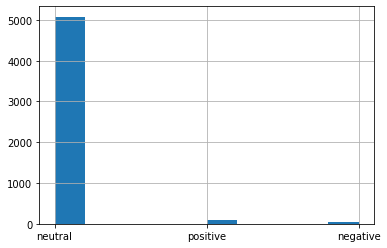

In [9]:
dfaux["sentimiento"].hist()